In [1]:
import hddm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data, params = hddm.generate.gen_rand_data(params={'easy': {'v': 1, 'a': 2, 't': .3},
                                                   'hard': {'v': 1, 'a': 2, 't': .3}})

In [5]:
m = hddm.HDDM(data, depends_on={'v': 'condition'},
             include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False)
m.sample(1000, burn=20)

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 13.7 sec

In [6]:
print(m.nodes_db)

           knode_name stochastic observed   subj        node      tag  \
a                   a       True    False  False           a       ()   
v(easy)             v       True    False  False     v(easy)  (easy,)   
v(hard)             v       True    False  False     v(hard)  (hard,)   
t                   t       True    False  False           t       ()   
z_trans       z_trans       True    False  False     z_trans       ()   
z                   z      False    False  False           z       ()   
wfpt(easy)       wfpt      False     True  False  wfpt(easy)  (easy,)   
wfpt(hard)       wfpt      False     True  False  wfpt(hard)  (hard,)   

                depends hidden   rt response subj_idx condition      mean  \
a                    []  False  NaN      NaN      NaN       NaN   1.86928   
v(easy)     [condition]  False  NaN      NaN      NaN      easy  0.829456   
v(hard)     [condition]  False  NaN      NaN      NaN      hard    1.4436   
t                    []  False  Na

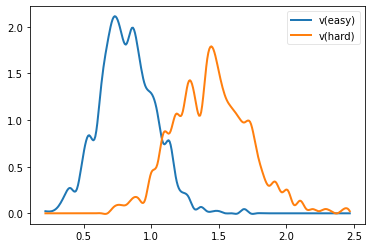

In [7]:
hddm.analyze.plot_posterior_nodes(m.nodes_db.loc[['v(easy)', 'v(hard)'], 'node'])

In [8]:
ppc_data = hddm.utils.post_pred_gen(m)

 [--------------------------150%---------------------------] 3 of 2 complete in 3.7 sec

In [9]:
hddm.utils.post_pred_stats(data, ppc_data)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.840000,0.873442,0.070132,0.001118,0.006037,True,30.850000,0.476839
mean_ub,1.027738,0.999675,0.113883,0.000788,0.013757,True,62.299999,0.246417
std_ub,0.562066,0.504260,0.130225,0.003342,0.020300,True,68.199997,0.443898
10q_ub,0.513800,0.535836,0.054047,0.000486,0.003407,True,37.700001,0.407726
30q_ub,0.683900,0.691727,0.083415,0.000061,0.007019,True,54.500000,0.093834
50q_ub,0.897500,0.854680,0.098975,0.001834,0.011630,True,70.300003,0.432638
70q_ub,1.134000,1.100520,0.137352,0.001121,0.019987,True,64.599998,0.243755
90q_ub,1.604700,1.625840,0.261682,0.000447,0.068925,True,50.000000,0.080785
mean_lb,-1.011312,-0.868563,0.231261,0.020377,0.073859,True,25.653923,0.617265


In [10]:
ppc_data.head(10)

rt  response
node       sample                      
wfpt(easy) 0      0  0.511622         1
                  1  0.541622         1
                  2  0.934617         1
                  3  3.344582         1
                  4  0.775619         1
                  5  0.783619         1
                  6  0.882617         1
                  7  0.667620         1
                  8  0.769619         1
                  9  1.265612         1

In [11]:
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data)

In [12]:
print(ppc_compare)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.840000  0.873442  0.070132  0.001118  0.006037     True   
mean_ub   1.027738  0.999675  0.113883  0.000788  0.013757     True   
std_ub    0.562066  0.504260  0.130225  0.003342  0.020300     True   
10q_ub    0.513800  0.535836  0.054047  0.000486  0.003407     True   
30q_ub    0.683900  0.691727  0.083415  0.000061  0.007019     True   
50q_ub    0.897500  0.854680  0.098975  0.001834  0.011630     True   
70q_ub    1.134000  1.100520  0.137352  0.001121  0.019987     True   
90q_ub    1.604700  1.625840  0.261682  0.000447  0.068925     True   
mean_lb  -1.011312 -0.868563  0.231261  0.020377  0.073859     True   
std_lb    0.516023  0.328377  0.207430  0.035211  0.078238     True   
10q_lb    0.494500  0.562411  0.123297  0.004612  0.019814     True   
30q_lb    0.630500  0.659403  0.160746  0.000835  0.026675     True   
50q_lb

In [13]:
ppc_stats = hddm.utils.post_pred_stats(data, ppc_data, call_compare=False)

In [14]:
print(ppc_stats.head())

                   accuracy   mean_ub    std_ub    10q_ub    30q_ub    50q_ub  \
node       sample                                                               
wfpt(easy) 0           0.90  1.005375  0.609619  0.493422  0.659420  0.794619   
           1           0.84  1.039100  0.784862  0.534969  0.658168  0.853865   
           2           0.88  1.080030  0.768850  0.499844  0.692042  0.859940   
           3           0.84  0.942917  0.631278  0.467171  0.601671  0.785369   
           4           0.90  0.907884  0.386712  0.497574  0.599774  0.868770   

                     70q_ub    90q_ub   mean_lb    std_lb    10q_lb    30q_lb  \
node       sample                                                               
wfpt(easy) 0       1.096215  1.483021 -0.600621  0.114265  0.496422  0.524422   
           1       1.132161  1.285759 -1.395128  0.594361  0.673267  0.774867   
           2       1.133137  1.783359 -0.932943  0.444583  0.518444  0.554944   
           3       0.902667

## Using PPC for model comparison with the `groupby` argument

In [15]:
m_pooled = hddm.HDDM(data, # v does not depend on conditions
                    include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False) 
m_pooled.sample(1000, burn=20)
ppc_data_pooled = hddm.utils.post_pred_gen(m_pooled, groupby=['condition'])

No model attribute --> setting up standard HDDM
Set model to ddm
 [-------------------------------------------------------300%-------------------------------------------------------] 3 of 1 complete in 4.1 sec

In [16]:
hddm.utils.post_pred_stats(data, ppc_data_pooled)

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.840000,0.862641,0.063773,5.125923e-04,0.004580,True,29.700001,0.355016
mean_ub,1.027738,1.027954,0.077028,4.681336e-08,0.005933,True,54.200001,0.002809
std_ub,0.562066,0.553277,0.111760,7.726141e-05,0.012568,True,55.799999,0.078649
10q_ub,0.513800,0.532543,0.033637,3.512890e-04,0.001483,True,30.000000,0.557207
30q_ub,0.683900,0.693620,0.040147,9.448123e-05,0.001706,True,38.599998,0.242116
50q_ub,0.897500,0.871082,0.066934,6.979292e-04,0.005178,True,66.599998,0.394691
70q_ub,1.134000,1.140866,0.104060,4.713597e-05,0.010876,True,50.799999,0.065977
90q_ub,1.604700,1.687840,0.241572,6.912237e-03,0.065270,True,40.599998,0.344161
mean_lb,-1.011312,-0.956484,0.183582,3.006116e-03,0.036709,True,34.000000,0.298656


## Defining your own summary statistics

In [17]:
ppc_stats = hddm.utils.post_pred_stats(data, ppc_data, stats=lambda x: np.mean(x), call_compare=False)

In [18]:
ppc_stats.head()

stat
node       sample          
wfpt(easy) 0       0.844776
           1       0.649623
           2       0.838473
           3       0.625591
           4       0.747838

## Summary statistics relating to outside variables

In [19]:
from numpy.random import randn
data['trlbytrl'] = randn(len(data))

In [20]:
m_reg = hddm.HDDMRegressor(data, 'v ~ trlbytrl',
                          include = ['v', 'a', 't', 'z'],
                        informative = True,
                        is_group_model = False)
m_reg.sample(1000, burn=20)

ppc_data = hddm.utils.post_pred_gen(m_reg, append_data=True)

No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1 of 1 complete in 0.0 sec7.4 sec

In [21]:
from scipy.stats import linregress
ppc_regression = []
for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    ppc_regression.append(linregress(sim_data.trlbytrl, sim_data.rt_sampled)[0]) # slope

orig_regression = linregress(data.trlbytrl, data.rt)[0]

In [22]:
cnt = 0
for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    print(sim_data)
    cnt += 1
    if cnt > 2:
        break

                rt_sampled  response_sampled  index     rt  response  \
node sample                                                            
wfpt 0      0     1.659329                 1      0  1.614       1.0   
            1     1.216315                 1      1  1.066       1.0   
            2     0.511323                 1      2  0.572       1.0   
            3     1.477321                 1      3  0.655       1.0   
            4     0.629322                 1      4  1.161       1.0   
...                    ...               ...    ...    ...       ...   
            95    0.468323                 1     95  0.854       1.0   
            96   -0.740321                 0     96  1.224       1.0   
            97    1.184315                 1     97  1.583       1.0   
            98    1.550324                 1     98  1.462       1.0   
            99    1.069317                 1     99  0.555       1.0   

                subj_idx condition  trlbytrl  
node sample     

Text(0.5, 0, 'slope')

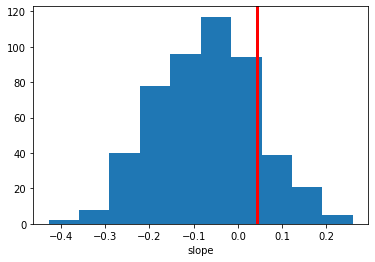

In [23]:
plt.hist(ppc_regression)
plt.axvline(orig_regression, c='r', lw=3)
plt.xlabel('slope')